This notebook investigates alexnet-based model with normalisation and a new learning rate schedule.

The changes made include: increasing the number of epochs on which learning rate and momentum saturate to 250 (instead of original 25); making scaling factors of the learning rate smaller (shrink_amt = 0.99 instead of 0.9 and grow_amt = 1.01 instead 1.1); and monitoring `valid_y_nll`. Both best and most recent models are saved.

Quite soon, `valid_y_nll` started looking pretty good. Let's check the score. But first, we want to know what to compare it to. Looking at the equivalent model with original learning rate schedule (`alexnet_based_norm_global.pkl`):

In [1]:
cd ..

/afs/inf.ed.ac.uk/user/s13/s1320903/Neuroglycerin/neukrill-net-work


In [2]:
%run check_test_score.py -v run_settings/alexnet_based_norm_global.json

Loading settings..
Loading model...
Loading data...
Applying normalisation: global
Finding batch size...
    chosen batch size 3089 for 1 batches
Compiling forward prop...
Making predictions...
    Batch 1 of 1
Log loss: 1.97530998748


Using gpu device 1: Tesla K40c


Just to make sure nothing goes wrong with reads/writes (as this model takes a lot less time per epoch), get a backup of the best model so far.

Now check score of our model:

In [3]:
%run check_test_score.py -v run_settings/alexnet_learning_rate.json

Loading settings..
Loading model...
Loading data...
Applying normalisation: global
Finding batch size...
    chosen batch size 3089 for 1 batches
Compiling forward prop...
Making predictions...
    Batch 1 of 1
Log loss: 1.98909556846


Was hoping for a better score there... Check how many epochs each model saw:

In [4]:
%matplotlib inline

generating names...
...done
set x_axis to example
A. learning_rate
B. momentum
C. total_seconds_last_epoch
D. train_h1_kernel_norms_max
E. train_h1_kernel_norms_mean
F. train_h1_kernel_norms_min
G. train_h1_max_x_max_u
H. train_h1_max_x_mean_u
I. train_h1_max_x_min_u
J. train_h1_mean_x_max_u
K. train_h1_mean_x_mean_u
L. train_h1_mean_x_min_u
M. train_h1_min_x_max_u
N. train_h1_min_x_mean_u
O. train_h1_min_x_min_u
P. train_h1_range_x_max_u
Q. train_h1_range_x_mean_u
R. train_h1_range_x_min_u
S. train_h2_kernel_norms_max
T. train_h2_kernel_norms_mean
U. train_h2_kernel_norms_min
V. train_h2_max_x_max_u
W. train_h2_max_x_mean_u
X. train_h2_max_x_min_u
Y. train_h2_mean_x_max_u
Z. train_h2_mean_x_mean_u
BA. train_h2_mean_x_min_u
BB. train_h2_min_x_max_u
BC. train_h2_min_x_mean_u
BD. train_h2_min_x_min_u
BE. train_h2_range_x_max_u
BF. train_h2_range_x_mean_u
BG. train_h2_range_x_min_u
BH. train_h3_kernel_norms_max
BI. train_h3_kernel_norms_mean
BJ. train_h3_kernel_norms_min
BK. train_h3_max_

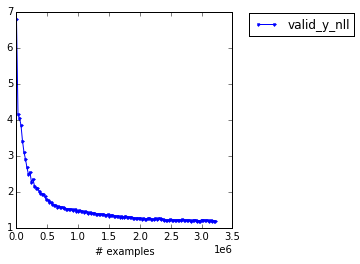

set x_axis to example
A. learning_rate
B. momentum
C. total_seconds_last_epoch
D. train_h1_kernel_norms_max
E. train_h1_kernel_norms_mean
F. train_h1_kernel_norms_min
G. train_h1_max_x_max_u
H. train_h1_max_x_mean_u
I. train_h1_max_x_min_u
J. train_h1_mean_x_max_u
K. train_h1_mean_x_mean_u
L. train_h1_mean_x_min_u
M. train_h1_min_x_max_u
N. train_h1_min_x_mean_u
O. train_h1_min_x_min_u
P. train_h1_range_x_max_u
Q. train_h1_range_x_mean_u
R. train_h1_range_x_min_u
S. train_h2_kernel_norms_max
T. train_h2_kernel_norms_mean
U. train_h2_kernel_norms_min
V. train_h2_max_x_max_u
W. train_h2_max_x_mean_u
X. train_h2_max_x_min_u
Y. train_h2_mean_x_max_u
Z. train_h2_mean_x_mean_u
BA. train_h2_mean_x_min_u
BB. train_h2_min_x_max_u
BC. train_h2_min_x_mean_u
BD. train_h2_min_x_min_u
BE. train_h2_range_x_max_u
BF. train_h2_range_x_mean_u
BG. train_h2_range_x_min_u
BH. train_h3_kernel_norms_max
BI. train_h3_kernel_norms_mean
BJ. train_h3_kernel_norms_min
BK. train_h3_max_x_max_u
BL. train_h3_max_x_m

In [5]:
%run ~/Neuroglycerin/pylearn2/pylearn2/scripts/plot_monitor.py /disk/scratch/neuroglycerin/models/alexnet_based_norm_global.pkl

generating names...
...done
set x_axis to example
A. learning_rate
B. momentum
C. total_seconds_last_epoch
D. train_h1_kernel_norms_max
E. train_h1_kernel_norms_mean
F. train_h1_kernel_norms_min
G. train_h1_max_x_max_u
H. train_h1_max_x_mean_u
I. train_h1_max_x_min_u
J. train_h1_mean_x_max_u
K. train_h1_mean_x_mean_u
L. train_h1_mean_x_min_u
M. train_h1_min_x_max_u
N. train_h1_min_x_mean_u
O. train_h1_min_x_min_u
P. train_h1_range_x_max_u
Q. train_h1_range_x_mean_u
R. train_h1_range_x_min_u
S. train_h2_kernel_norms_max
T. train_h2_kernel_norms_mean
U. train_h2_kernel_norms_min
V. train_h2_max_x_max_u
W. train_h2_max_x_mean_u
X. train_h2_max_x_min_u
Y. train_h2_mean_x_max_u
Z. train_h2_mean_x_mean_u
BA. train_h2_mean_x_min_u
BB. train_h2_min_x_max_u
BC. train_h2_min_x_mean_u
BD. train_h2_min_x_min_u
BE. train_h2_range_x_max_u
BF. train_h2_range_x_mean_u
BG. train_h2_range_x_min_u
BH. train_h3_kernel_norms_max
BI. train_h3_kernel_norms_mean
BJ. train_h3_kernel_norms_min
BK. train_h3_max_

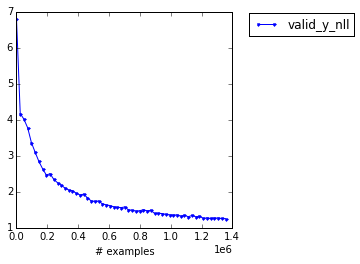

set x_axis to example
A. learning_rate
B. momentum
C. total_seconds_last_epoch
D. train_h1_kernel_norms_max
E. train_h1_kernel_norms_mean
F. train_h1_kernel_norms_min
G. train_h1_max_x_max_u
H. train_h1_max_x_mean_u
I. train_h1_max_x_min_u
J. train_h1_mean_x_max_u
K. train_h1_mean_x_mean_u
L. train_h1_mean_x_min_u
M. train_h1_min_x_max_u
N. train_h1_min_x_mean_u
O. train_h1_min_x_min_u
P. train_h1_range_x_max_u
Q. train_h1_range_x_mean_u
R. train_h1_range_x_min_u
S. train_h2_kernel_norms_max
T. train_h2_kernel_norms_mean
U. train_h2_kernel_norms_min
V. train_h2_max_x_max_u
W. train_h2_max_x_mean_u
X. train_h2_max_x_min_u
Y. train_h2_mean_x_max_u
Z. train_h2_mean_x_mean_u
BA. train_h2_mean_x_min_u
BB. train_h2_min_x_max_u
BC. train_h2_min_x_mean_u
BD. train_h2_min_x_min_u
BE. train_h2_range_x_max_u
BF. train_h2_range_x_mean_u
BG. train_h2_range_x_min_u
BH. train_h3_kernel_norms_max
BI. train_h3_kernel_norms_mean
BJ. train_h3_kernel_norms_min
BK. train_h3_max_x_max_u
BL. train_h3_max_x_m

In [6]:
%run ~/Neuroglycerin/pylearn2/pylearn2/scripts/plot_monitor.py /disk/scratch/neuroglycerin/models/alexnet_learning_rate.pkl.backup

Let it run a little longer.

Check again, best file first:

generating names...
...done
set x_axis to example
A. learning_rate
B. momentum
C. total_seconds_last_epoch
D. train_h1_kernel_norms_max
E. train_h1_kernel_norms_mean
F. train_h1_kernel_norms_min
G. train_h1_max_x_max_u
H. train_h1_max_x_mean_u
I. train_h1_max_x_min_u
J. train_h1_mean_x_max_u
K. train_h1_mean_x_mean_u
L. train_h1_mean_x_min_u
M. train_h1_min_x_max_u
N. train_h1_min_x_mean_u
O. train_h1_min_x_min_u
P. train_h1_range_x_max_u
Q. train_h1_range_x_mean_u
R. train_h1_range_x_min_u
S. train_h2_kernel_norms_max
T. train_h2_kernel_norms_mean
U. train_h2_kernel_norms_min
V. train_h2_max_x_max_u
W. train_h2_max_x_mean_u
X. train_h2_max_x_min_u
Y. train_h2_mean_x_max_u
Z. train_h2_mean_x_mean_u
BA. train_h2_mean_x_min_u
BB. train_h2_min_x_max_u
BC. train_h2_min_x_mean_u
BD. train_h2_min_x_min_u
BE. train_h2_range_x_max_u
BF. train_h2_range_x_mean_u
BG. train_h2_range_x_min_u
BH. train_h3_kernel_norms_max
BI. train_h3_kernel_norms_mean
BJ. train_h3_kernel_norms_min
BK. train_h3_max_

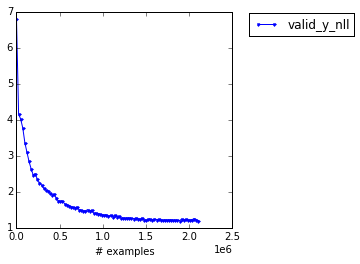

set x_axis to example
A. learning_rate
B. momentum
C. total_seconds_last_epoch
D. train_h1_kernel_norms_max
E. train_h1_kernel_norms_mean
F. train_h1_kernel_norms_min
G. train_h1_max_x_max_u
H. train_h1_max_x_mean_u
I. train_h1_max_x_min_u
J. train_h1_mean_x_max_u
K. train_h1_mean_x_mean_u
L. train_h1_mean_x_min_u
M. train_h1_min_x_max_u
N. train_h1_min_x_mean_u
O. train_h1_min_x_min_u
P. train_h1_range_x_max_u
Q. train_h1_range_x_mean_u
R. train_h1_range_x_min_u
S. train_h2_kernel_norms_max
T. train_h2_kernel_norms_mean
U. train_h2_kernel_norms_min
V. train_h2_max_x_max_u
W. train_h2_max_x_mean_u
X. train_h2_max_x_min_u
Y. train_h2_mean_x_max_u
Z. train_h2_mean_x_mean_u
BA. train_h2_mean_x_min_u
BB. train_h2_min_x_max_u
BC. train_h2_min_x_mean_u
BD. train_h2_min_x_min_u
BE. train_h2_range_x_max_u
BF. train_h2_range_x_mean_u
BG. train_h2_range_x_min_u
BH. train_h3_kernel_norms_max
BI. train_h3_kernel_norms_mean
BJ. train_h3_kernel_norms_min
BK. train_h3_max_x_max_u
BL. train_h3_max_x_m

In [18]:
%run ~/Neuroglycerin/pylearn2/pylearn2/scripts/plot_monitor.py /disk/scratch/neuroglycerin/models/alexnet_learning_rate.pkl

And the most recent now:

generating names...
...done
set x_axis to example
A. learning_rate
B. momentum
C. total_seconds_last_epoch
D. train_h1_kernel_norms_max
E. train_h1_kernel_norms_mean
F. train_h1_kernel_norms_min
G. train_h1_max_x_max_u
H. train_h1_max_x_mean_u
I. train_h1_max_x_min_u
J. train_h1_mean_x_max_u
K. train_h1_mean_x_mean_u
L. train_h1_mean_x_min_u
M. train_h1_min_x_max_u
N. train_h1_min_x_mean_u
O. train_h1_min_x_min_u
P. train_h1_range_x_max_u
Q. train_h1_range_x_mean_u
R. train_h1_range_x_min_u
S. train_h2_kernel_norms_max
T. train_h2_kernel_norms_mean
U. train_h2_kernel_norms_min
V. train_h2_max_x_max_u
W. train_h2_max_x_mean_u
X. train_h2_max_x_min_u
Y. train_h2_mean_x_max_u
Z. train_h2_mean_x_mean_u
BA. train_h2_mean_x_min_u
BB. train_h2_min_x_max_u
BC. train_h2_min_x_mean_u
BD. train_h2_min_x_min_u
BE. train_h2_range_x_max_u
BF. train_h2_range_x_mean_u
BG. train_h2_range_x_min_u
BH. train_h3_kernel_norms_max
BI. train_h3_kernel_norms_mean
BJ. train_h3_kernel_norms_min
BK. train_h3_max_

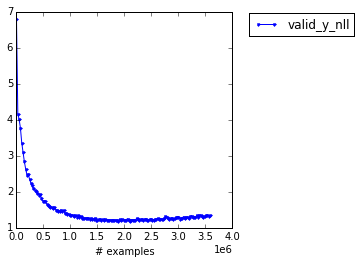

set x_axis to example
A. learning_rate
B. momentum
C. total_seconds_last_epoch
D. train_h1_kernel_norms_max
E. train_h1_kernel_norms_mean
F. train_h1_kernel_norms_min
G. train_h1_max_x_max_u
H. train_h1_max_x_mean_u
I. train_h1_max_x_min_u
J. train_h1_mean_x_max_u
K. train_h1_mean_x_mean_u
L. train_h1_mean_x_min_u
M. train_h1_min_x_max_u
N. train_h1_min_x_mean_u
O. train_h1_min_x_min_u
P. train_h1_range_x_max_u
Q. train_h1_range_x_mean_u
R. train_h1_range_x_min_u
S. train_h2_kernel_norms_max
T. train_h2_kernel_norms_mean
U. train_h2_kernel_norms_min
V. train_h2_max_x_max_u
W. train_h2_max_x_mean_u
X. train_h2_max_x_min_u
Y. train_h2_mean_x_max_u
Z. train_h2_mean_x_mean_u
BA. train_h2_mean_x_min_u
BB. train_h2_min_x_max_u
BC. train_h2_min_x_mean_u
BD. train_h2_min_x_min_u
BE. train_h2_range_x_max_u
BF. train_h2_range_x_mean_u
BG. train_h2_range_x_min_u
BH. train_h3_kernel_norms_max
BI. train_h3_kernel_norms_mean
BJ. train_h3_kernel_norms_min
BK. train_h3_max_x_max_u
BL. train_h3_max_x_m

In [19]:
%run ~/Neuroglycerin/pylearn2/pylearn2/scripts/plot_monitor.py /disk/scratch/neuroglycerin/models/alexnet_learning_rate_recent.pkl

The score it gets on the holdout set is:

In [17]:
%run check_test_score.py -v run_settings/alexnet_learning_rate.json

Loading settings..
Loading model...
Loading data...
Applying normalisation: global
Finding batch size...
    chosen batch size 3089 for 1 batches
Compiling forward prop...
Making predictions...
    Batch 1 of 1
Log loss: 2.05778594131


It got worse!

Now check scores of two models with only number of saturating epoch changed. One monitored `valid_y_nll`, another `valid_objective`.

In [20]:
%run check_test_score.py -v run_settings/alexnet_learning_rate2.json

Loading settings..
Loading model...
Loading data...
Applying normalisation: global
Finding batch size...
    chosen batch size 3089 for 1 batches
Compiling forward prop...
Making predictions...
    Batch 1 of 1
Log loss: 1.98382238088


In [21]:
%run check_test_score.py -v run_settings/alexnet_learning_rate3.json

Loading settings..
Loading model...
Loading data...
Applying normalisation: global
Finding batch size...
    chosen batch size 3089 for 1 batches
Compiling forward prop...
Making predictions...
    Batch 1 of 1
Log loss: 1.95892133093


The one monitoring `valid_objective` seems to have done a little better, so will keep this for the development of the current best model.